In [1]:
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
# keras.__version__
import matplotlib.pyplot as plt
import random


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

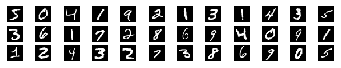

In [2]:
mnist = keras.datasets.mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [3]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [4]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Setting Data & Parameters

In [5]:
tf.set_random_seed(777)  # for reproducibility

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(X_train.shape[0] / batch_size)

In [6]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

# NN 의 문제점

- Vanishing Gradient
- Overfitting 


-  해결방법: Geoffrey Hinton’s summary of finding up to today
    1. Our labeled datasets were thousands of times too small
    2. Out computers were millions of times too slow
    3. We initialized the weight in a stupid way
    4. We used the wrong type of non-linearity
    
    
-> Another Activation Function (e.g., ReLU)
    
->  Weight Initialization (e.g., RBM, Xavier)


# MNIST Simple - Softmax (92.07%)

Epoch: 0001, Cost: 8.349071570
Epoch: 0002, Cost: 3.945423525
Epoch: 0003, Cost: 2.476440671
Epoch: 0004, Cost: 1.993275747
Epoch: 0005, Cost: 1.567288953
Epoch: 0006, Cost: 1.315574946
Epoch: 0007, Cost: 1.187640692
Epoch: 0008, Cost: 1.153053203
Epoch: 0009, Cost: 0.975832514
Epoch: 0010, Cost: 0.880599426
Epoch: 0011, Cost: 0.881525149
Epoch: 0012, Cost: 0.756160670
Epoch: 0013, Cost: 0.856528202
Epoch: 0014, Cost: 0.812715300
Epoch: 0015, Cost: 0.745195524
Epoch: 0016, Cost: 0.706151605
Epoch: 0017, Cost: 0.675870856
Epoch: 0018, Cost: 0.614093752
Epoch: 0019, Cost: 0.680277948
Epoch: 0020, Cost: 0.595901807
Epoch: 0021, Cost: 0.584149028
Epoch: 0022, Cost: 0.640533935
Epoch: 0023, Cost: 0.615513751
Epoch: 0024, Cost: 0.511086659
Epoch: 0025, Cost: 0.550201741
Epoch: 0026, Cost: 0.558958994
Epoch: 0027, Cost: 0.545070681
Epoch: 0028, Cost: 0.480769500
Epoch: 0029, Cost: 0.479089481
Epoch: 0030, Cost: 0.567238196
Epoch: 0031, Cost: 0.574723486
Epoch: 0032, Cost: 0.479385910
Epoch: 0

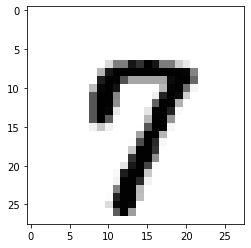

In [8]:
hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=tf.stop_gradient(Y)
    )
)

#AdapOptimizer 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# train my model
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = next_batch(5, X_train, Y_train)

            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")

    # Test model and check accuracy
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: X_test, Y: Y_test}),
    )

    # Get one and predict
    r = random.randint(0, X_test.shape[0] - 1)

    print("Label: ", sess.run(tf.argmax(Y_test[r : r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: X_test[r : r + 1]}
        ),
    )

    plt.imshow(
        X_test[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()


# NN for MNIST (91.6%)

위의 simple 과 다른점!
- 3개의 layer 
- ReLU Activation function
- AdamOptimzer 사용 
    - GradientDescnt 사용시 Cost 가 너무 높아!
    - <span class="mark">그 이유는????</span>
- 그래도 simple 보다 성능이 낮다!!
    - Vanishing gradient, Overfitting 의 문제점

In [15]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=Y
    )
)


# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(X_train.shape[0] / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = next_batch(5, X_train, Y_train)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: X_test, Y: Y_test}))

# Get one and predict
r = random.randint(0, X_test.shape[0] - 1)
print("Label: ", sess.run(tf.argmax(Y_test[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: X_test[r:r + 1]}))


Epoch: 0001 cost = 305.548692740
Epoch: 0002 cost = 103.726367054
Epoch: 0003 cost = 73.024195420
Epoch: 0004 cost = 58.290952824
Epoch: 0005 cost = 41.144590531
Epoch: 0006 cost = 41.947407991
Epoch: 0007 cost = 38.971400772
Epoch: 0008 cost = 36.178555730
Epoch: 0009 cost = 31.196481701
Epoch: 0010 cost = 27.525687645
Epoch: 0011 cost = 31.201659956
Epoch: 0012 cost = 25.780164402
Epoch: 0013 cost = 20.096388386
Epoch: 0014 cost = 20.611374239
Epoch: 0015 cost = 18.889040844
Learning Finished!
Accuracy: 0.916
Label:  [7]
Prediction:  [7]


# NN with Xavier for MNIST (95.7%)

- Weight 초기화
    - 기존 : tf.random_normal()
    - Xavier : initializer=tf.contrib.layers.xavier_initializer())
         - epoch 1 부터 cost 가 낮음!

In [20]:
##Variable w1 already exists, disallowed.

#1. 이전에 get_variable 로 생성된 변수 삭제
tf.reset_default_graph()

 
#2. 특정 공간 내에서만 변수가 유효하도록 설정

In [21]:
xavier_initializer = tf.contrib.layers.xavier_initializer()

In [22]:
 
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=xavier_initializer)
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=xavier_initializer)
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=xavier_initializer)
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(X_train.shape[0]/ batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = next_batch(5, X_train, Y_train)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: X_test, Y: Y_test}))

# Get one and predict
r = random.randint(0, X_test.shape[0] - 1)
print("Label: ", sess.run(tf.argmax(Y_test[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: X_test[r:r + 1]}))

Epoch: 0001 cost = 0.666920797
Epoch: 0002 cost = 0.333713752
Epoch: 0003 cost = 0.270432347
Epoch: 0004 cost = 0.199046450
Epoch: 0005 cost = 0.200219855
Epoch: 0006 cost = 0.205369528
Epoch: 0007 cost = 0.170421803
Epoch: 0008 cost = 0.185998726
Epoch: 0009 cost = 0.151544996
Epoch: 0010 cost = 0.161922995
Epoch: 0011 cost = 0.137975735
Epoch: 0012 cost = 0.146844062
Epoch: 0013 cost = 0.133591782
Epoch: 0014 cost = 0.111300988
Epoch: 0015 cost = 0.129386781
Learning Finished!
Accuracy: 0.9571
Label:  [9]
Prediction:  [9]


# NN - Deep for MNIST (97.42%)

- Xavier
- 5 Layer
- 512 node

    - Xavier 만 사용했을 때보다 낮은 정확도!
    - Problem : Overfitting 

In [23]:
tf.reset_default_graph()

In [24]:


# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(X_train.shape[0]/ batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = next_batch(5, X_train, Y_train)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: X_test, Y: Y_test}))

# Get one and predict
r = random.randint(0, X_test.shape[0] - 1)
print("Label: ", sess.run(tf.argmax(Y_test[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: X_test[r:r + 1]}))

Epoch: 0001 cost = 0.812612216
Epoch: 0002 cost = 0.425028810
Epoch: 0003 cost = 0.349618246
Epoch: 0004 cost = 0.293401256
Epoch: 0005 cost = 0.280735502
Epoch: 0006 cost = 0.283322707
Epoch: 0007 cost = 0.271189488
Epoch: 0008 cost = 0.237625792
Epoch: 0009 cost = 0.221558850
Epoch: 0010 cost = 0.259535939
Epoch: 0011 cost = 0.180214634
Epoch: 0012 cost = 0.252304744
Epoch: 0013 cost = 0.207063755
Epoch: 0014 cost = 0.184041029
Epoch: 0015 cost = 0.190609413
Learning Finished!
Accuracy: 0.9498
Label:  [7]
Prediction:  [7]


# NN with Dropout for MNIST (98.04%)

- Overfitting 방지!

- tf.nn.dropout(Layer1, keep_prob = keep_prob)
    - keep_prob : 전체 중 몇 % 를 keep할건지
    
    - train : 0.5 ~ 0.7
    - test : 1 (알고 있는 모든 것을 총 동원!)
    
+ Optimizer
    - 기존 : Gradient Descent
    - new : Adam, SGD, Adagrad, RMSProp....
    - optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



In [ ]:
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

# NN Bach Normalizatoin for MNIST
